In [1]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gmean
import sys
sys.path.insert(0,'../../../statistics_helper/')
pd.options.display.float_format = '{:,.1e}'.format
from CI_helper import *
from excel_utils import *

# Estimating the biomass of wild mammals
To estimate the total biomass of wild mammals, we first estimate the total biomass of wild land mammals and wild marine mammals.

## Estimating the biomass of wild land mammals
To estimate the total biomass of land mammals living today we rely on three sources. The first is [Smil](http://vaclavsmil.com/wp-content/uploads/PDR37-4.Smil_.pgs613-636.pdf), which estimates ≈0.025 Gt wet weight based on biomass densities per biome taken from the History Database of the Global Environment (HYDE).

In [2]:
smil_estimate = 0.025e15

The second source is an estimate made in [Barnosky](http://dx.doi.org/10.1073/pnas.0801918105), which reports an estimate of ≈0.05 Gt wet weight.

In [3]:
barnosky_estimate = 10**10.72*1000 #From figure 3

The third source is based on data on the mass of individual mammals for each mammal species, the population density of each species, and the study area in which the population density was measured ([Novosolov et al.](http://dx.doi.org/10.1111/geb.12617)). This dataset included data on ≈350 mammal species. Using multiple regression, a power-law (log-log) functional relation was established between body mass, study area and the total number of individuals measured in the study area. The functional relation established is: $$log_{10}(number\ of\ individuals) = 1.65-0.53×log_{10}(body\ mass) + 0.73×log_{10}(study\ area), (R^2≈0.5)$$ This relation was used to extrapolate the total number of individuals for ≈3700 mammal species for which range and mass data is available, by using range sizes from IUCN data (http://www.iucnredlist.org/technical-documents/spatial-data#mammals) as a surrogate for study area, and data on body mass ([Meiri et al.](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2699.2010.02390.x/full); there are additional ≈1800 mammal species without mass data, but these usually have small body mass, small ranges and low population densities). From total number of individuals the total biomass is calculated by multiplying the total number of individuals by the mean body mass. This approach yielded an estimate of ≈0.006 Gt wet weight.

In [4]:
# Estimate produced by the third approach
shai_meiri_estimate = 5454700007879

Our estimate of the total biomass of wild mammals is based on the geometric mean of these three estimates. We convert wet weight values to carbon mass assuming 70% water content and 50% carbon content out of dry weight.

In [5]:
# Conversion factor between wet weight and carbon mass
wet_to_c = 0.15

# Estimate the total biomass of land mammals
best_land_mammal_biomass = gmean([smil_estimate,shai_meiri_estimate,barnosky_estimate])*wet_to_c

print('Our best estimate of the total biomass of wild land mammals is ≈%.3f Gt C'%(best_land_mammal_biomass/1e15))

Our best estimate of the total biomass of wild land mammals is ≈0.003 Gt C


## Estimating the biomass of wild marine mammals
For estimating the biomass of marine mammals, we rely on estimates made by [Christensen](https://open.library.ubc.ca/cIRcle/collections/ubctheses/831/items/1.0074892), based on using a dataset compiled by [Kaschner et al.](https://open.library.ubc.ca/collections/ubctheses/831/items/1.0074881), gathered from various resources. The biomass of marine mammals is dominated by whales and seals. Here is the data from Christensen:

In [6]:
christensen = pd.read_excel('marine_mammal_data.xlsx','Christensen',skiprows=1,index_col=0)
christensen

,Min,Mean,Max
Year,,,
1800,102061900000000,126185600000000,155876300000000
2000,22268040000000,29690720000000,42680410000000


We the mean values for the year 2000 as our best estimate for the biomass of wild marine mammals. We convert the estimates of Chirstensen, which are of the total wet weight of marine mammals to carbon mass assuming 70% water content and 50% carbon content of dry weight:  

In [7]:
best_christensen = christensen.loc[2000,'Mean']*wet_to_c

print('Our best estimate of the total biomass of wild marine mammals is ≈%.3f Gt C'%(best_christensen/1e15))

Our best estimate of the total biomass of wild marine mammals is ≈0.004 Gt C


We sum our estimates for the total biomass of wild land and marine mammals to generate our best estimate for the total biomass of wild mammals:

In [8]:
best_estimate = best_christensen+best_land_mammal_biomass

print('Our best estimate of the total biomass of wild marine mammals is ≈%.3f Gt C'%(best_estimate/1e15))

Our best estimate of the total biomass of wild marine mammals is ≈0.007 Gt C


# Uncertainty analysis
To estimate the uncertainty associated with our estimate of the total biomass of wild mammals, we first project the uncertainty associated with our estimate of the total biomass of wild land mammals and wild marine mammals, and then combine these uncertainties.

## Wild land mammals
Our projection of the uncertainty associated with our estimate of the total biomass of wild land mammals is based on the multiplicative 95% confidence interval around the geometric mean of the three independent estimates we use as sources for our best estimate.

In [9]:
land_mammal_CI = geo_CI_calc(np.array([smil_estimate,shai_meiri_estimate,barnosky_estimate]))

print('Our best projection for the uncertainty associated with our estimate of the total biomass of wild land mammals is ≈%0.0f-fold' %land_mammal_CI)

Our best projection for the uncertainty associated with our estimate of the total biomass of wild land mammals is ≈4-fold


## Wild marine mammals
To project the uncertainty associated with our estimate of the total biomass of wild marine mammals, we rely both on the intra-study uncertainty reported by Christensen, as well as on a consistency check against data from the IUCN. Christensen reports a 95% confidence interval of ≈1.4-fold. 

In [10]:
marine_intra_CI = christensen.loc[2000,'Max']/christensen.loc[2000,'Mean']

print('The intra-study uncertainty reported by Christensen is ≈%.1f-fold' %marine_intra_CI)

The intra-study uncertainty reported by Christensen is ≈1.4-fold


As a consistency check, we compared the data for ≈30 whale species which are the main contributors to the global marine mammal biomass with data from the IUCN. The correlation between the data is high (Spearman R$^2$=0.98), and the total biomass from both methods varies about ≈1.3-fold. 

The correlation coefficient between Christensen and the IUCN data is ≈0.98


The inter-study uncertainty between Christensen and the IUCN data is ≈1.3-fold


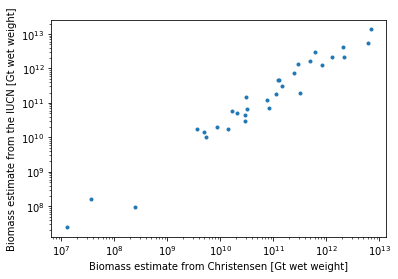

In [11]:
# Load IUCN data
comparison_data = pd.read_excel('marine_mammal_data.xlsx',index_col=0)

# IUCN values reported in tons, convert to grams
comparison_data['Biomass estimate from IUCN'] *=1e6
comparison_data['Biomass estimate from Christensen'] *=1e6

# Plot data
plt.loglog(comparison_data['Biomass estimate from Christensen'],comparison_data['Biomass estimate from IUCN'],'.')
plt.xlabel('Biomass estimate from Christensen [Gt wet weight]')
plt.ylabel('Biomass estimate from the IUCN [Gt wet weight]')

# Generate best estimate from the IUCN data by summing across all species and converting to carbon mass
best_IUCN = comparison_data['Biomass estimate from IUCN'].sum()*wet_to_c
print('The correlation coefficient between Christensen and the IUCN data is ≈%.2f' %(comparison_data.corr(method='spearman').iloc[0,1]))

# Calculate the inter-study uncertainty
marine_inter_CI = geo_CI_calc(np.array([best_IUCN,best_christensen]))
print('The inter-study uncertainty between Christensen and the IUCN data is ≈%.1f-fold' %marine_inter_CI)

As our best projection of the uncertainty associated with our estimate of the total biomass of wild marine mammals, we use the higher uncertainty out of the intra-study and intra-study uncertainties:

In [12]:
marine_mammal_CI = np.max([marine_inter_CI,marine_intra_CI])

To generate our projection of the total uncertainty associated with our estimate of the total biomass of wild mammals, we combine our uncertainties associated with our estimates for the total biomass of wild land and marine mammals:

In [13]:
mul_CI = CI_sum_prop(np.array([best_land_mammal_biomass,best_christensen]), np.array([land_mammal_CI,marine_mammal_CI]))
print('Our best projection for the uncertainty associated with our estimate of the total biomass of wild mammals is ≈%.0f-fold'%mul_CI)

Our best projection for the uncertainty associated with our estimate of the total biomass of wild mammals is ≈2-fold


# Prehuman wild mammal biomass
We can compare our estimates for the present day biomass of wild mammals with estimates of the prehuman biomass of wild land and marine mammals. For wild land mammals, we use the estimate of the prehuman biomass of wild land mammals reported in Barnosky of:

In [14]:
# Taken from figure 3 in Barnosky
prehuman_barnosky_biomass = 10**11.165*1000*wet_to_c 

print('Based on the data in Barnosky, we estimate wild land mammal biomass decreased ≈%.1f-fold' %(prehuman_barnosky_biomass/best_land_mammal_biomass))

Based on the data in Barnosky, we estimate wild land mammal biomass decreased ≈7.6-fold


For marine mammals, we rely on estimates by Christensen on values of wild marine mammals in 1800 before commercial whaling:

In [15]:
prehuman_marine_biomass = christensen.loc[1800,'Mean']*wet_to_c

print('Based on the data in Christensen, we estimate wild marine mammal biomass decreased ≈%.1f-fold, with a range of between ≈%.1f-fold and ≈%.1f-fold' %((prehuman_marine_biomass/best_christensen),(christensen.loc[1800,'Max']/christensen.loc[2000,'Min']) ,(christensen.loc[1800,'Min']/christensen.loc[2000,'Max'])))

Based on the data in Christensen, we estimate wild marine mammal biomass decreased ≈4.3-fold, with a range of between ≈7.0-fold and ≈2.4-fold


Overall, we can combine the estimates for the prehuman wild land and marine mammal biomass and estimate the reduction in total biomass of wild mammals between prehuman and present values:

In [16]:
prehuman = prehuman_barnosky_biomass + prehuman_marine_biomass

print('Our best estimate for the fold reduction in the biomass of wild mammals between prehuman and present values is ≈%.1f-fold' %(prehuman/best_estimate))

Our best estimate for the fold reduction in the biomass of wild mammals between prehuman and present values is ≈5.6-fold


In [17]:
# Feed results to the chordate biomass data
old_results = pd.read_excel('../../animal_biomass_estimate.xlsx',index_col=0)
result = old_results.copy()
result.loc['Wild mammals',(['Biomass [Gt C]','Uncertainty'])] = (best_estimate/1e15,mul_CI)
result.to_excel('../../animal_biomass_estimate.xlsx')

# Feed results to Table 1 & Fig. 1
update_results(sheet='Table1 & Fig1', 
               row=('Animals','Wild mammals'), 
               col=['Biomass [Gt C]', 'Uncertainty'],
               values=[best_estimate/1e15,mul_CI],
               path='../../../results.xlsx')


# Feed results to Fig. 2A
update_results(sheet='Fig2A', 
               row=('Terrestrial','Wild land mammals'), 
               col=['Biomass [Gt C]', 'Uncertainty'],
               values=[best_land_mammal_biomass/1e15,land_mammal_CI],
               path='../../../results.xlsx')

update_results(sheet='Fig2A', 
               row=('Marine','Wild marine mammals'), 
               col=['Biomass [Gt C]', 'Uncertainty'],
               values=[best_christensen/1e15,marine_mammal_CI],
               path='../../../results.xlsx')

# Update the data mentioned in the MS
update_MS_data(row ='Prehuman biomass of wild land mammals',
               values=prehuman_barnosky_biomass/1e15,
               path='../../../results.xlsx')

update_MS_data(row ='Prehuman biomass of marine mammals',
               values=prehuman_marine_biomass/1e15,
               path='../../../results.xlsx')


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:196: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2717: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
